In [6]:
#pip install kneed


In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# make_blobs: A function in scikit-learn used to generate synthetic clusters



In [9]:
#make_blobs() returns a tuple of two values:
#A two-dimensional NumPy array with the x- and y-values for each of the samples
#A one-dimensional NumPy array containing the cluster labels for each sample

features, true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

#Nondeterministic machine learning algorithms like k-means are difficult to reproduce. 
#The random_state parameter is set to an integer value so you can follow the data presented in the tutorial.
#In practice, it’s best to leave random_state as the default value, None.

In [10]:
#first five elements:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [11]:
true_labels[:5]

array([1, 0, 2, 2, 2])

# Feature Scaling : standardization

In [15]:
#https://scikit-learn.org/stable/modules/preprocessing.html
#Standardization scales, or shifts, the values for each numerical feature in your dataset
#so that the features have a mean of 0 and standard deviation of 1:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#scaled values:
scaled_features[:5]


array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [17]:
#1-set parameters of k-means so that it will be run n-init times and return one with least SSE
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

#2- fir it to the data in scaled-features
kmeans.fit(scaled_features)



KMeans(init='random', n_clusters=3, random_state=42)

In [18]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [19]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [21]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [22]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [25]:
#Choosing the Appropriate Number of Clusters
#1-The elbow method
#2-The silhouette coefficient

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

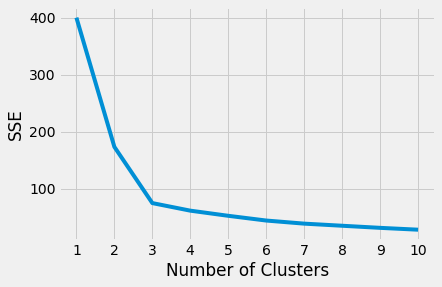

In [27]:
#plot SSE as a function of the number of clusters,
# SSE continues to decrease as you increase k. 

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
#If you’re having trouble choosing the elbow point of the curve, 
#then you could use a Python package, kneed, to identify the elbow point programmatically:

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [31]:
kl.elbow

3

In [33]:
#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

#How close the data point is to other points in the cluster
#How far away the data point is from points in other clusters
#Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


#instead of computing SSE, compute the silhouette coefficient:

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

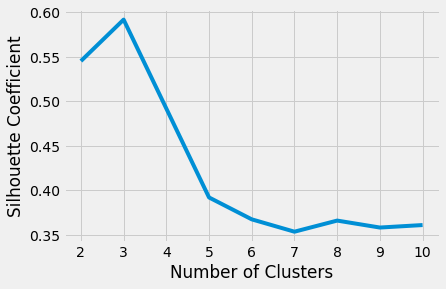

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Conclusion: your decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.